In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
items = pd.read_csv("../data/input/items.csv")
item_categories = pd.read_csv("../data/input/item_categories.csv")
shops = pd.read_csv("../data/input/shops.csv")
train = pd.read_csv("../data/input/sales_train.csv.gz")

In [3]:
train = pd.read_csv("../data/input/sales_train.csv.gz")
test = pd.read_csv("../data/input/test.csv.gz")
sample_predict = pd.read_csv("../data/input/sample_submission.csv.gz")

In [5]:
train_s = pd.merge(train, shops, on="shop_id", sort=False)
train_si = pd.merge(train_s, items, on="item_id", sort=False)
train_siic = pd.merge(train_si, item_categories, on="item_category_id", sort=False)


In [4]:
sample_predict.columns

Index(['ID', 'item_cnt_month'], dtype='object')

## データの欠損値確認

- train の各特徴量の種類，分布，欠損具合に付いて確認
- test : train 同様に確認，train との違いについて確認

In [6]:
# どのカラムにも null は存在しない

display(train_siic.head())
print(train_siic.isnull().any(axis=0))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


date                  False
date_block_num        False
shop_id               False
item_id               False
item_price            False
item_cnt_day          False
shop_name             False
item_name             False
item_category_id      False
item_category_name    False
dtype: bool


# データのハズレ値の存在を確認
- 販売個数　ー＞ 1000, 2000 は外れ値とみなして外しても良いかも，要調査
- 販売価格 　ー＞　高すぎるものについては外して良いかも, test データに出てくるか含めて要調査
- 各カテゴリ特徴の値ごとのレコード数

(0, 100)

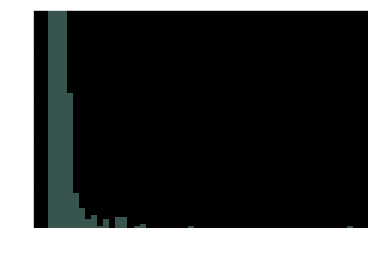

In [15]:
sns.distplot(train_siic['item_cnt_day'], kde=False)
plt.ylim([0, 100]) # 拡大

(0, 20)

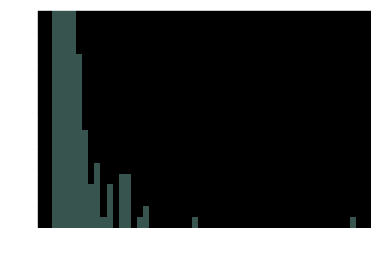

In [13]:
sns.distplot(train_siic['item_cnt_day'], kde=False)
plt.ylim([0, 20]) # 拡大

In [10]:
np.unique(train_siic['item_cnt_day'], return_counts=True)

(array([-2.200e+01, -1.600e+01, -9.000e+00, -6.000e+00, -5.000e+00,
        -4.000e+00, -3.000e+00, -2.000e+00, -1.000e+00,  1.000e+00,
         2.000e+00,  3.000e+00,  4.000e+00,  5.000e+00,  6.000e+00,
         7.000e+00,  8.000e+00,  9.000e+00,  1.000e+01,  1.100e+01,
         1.200e+01,  1.300e+01,  1.400e+01,  1.500e+01,  1.600e+01,
         1.700e+01,  1.800e+01,  1.900e+01,  2.000e+01,  2.100e+01,
         2.200e+01,  2.300e+01,  2.400e+01,  2.500e+01,  2.600e+01,
         2.700e+01,  2.800e+01,  2.900e+01,  3.000e+01,  3.100e+01,
         3.200e+01,  3.300e+01,  3.400e+01,  3.500e+01,  3.600e+01,
         3.700e+01,  3.800e+01,  3.900e+01,  4.000e+01,  4.100e+01,
         4.200e+01,  4.300e+01,  4.400e+01,  4.500e+01,  4.600e+01,
         4.700e+01,  4.800e+01,  4.900e+01,  5.000e+01,  5.100e+01,
         5.200e+01,  5.300e+01,  5.400e+01,  5.500e+01,  5.600e+01,
         5.700e+01,  5.800e+01,  5.900e+01,  6.000e+01,  6.100e+01,
         6.200e+01,  6.300e+01,  6.400e+01,  6.5

(0, 10)

(array([-1.0000e+00,  7.0000e-02,  8.7500e-02, ...,  5.0999e+04,
         5.9200e+04,  3.0798e+05]), array([1, 2, 1, ..., 1, 1, 1]))

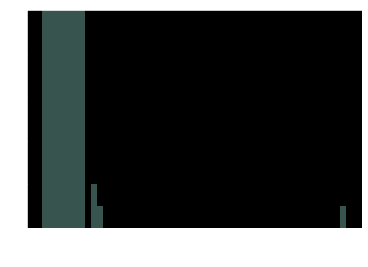

In [22]:
sns.distplot(train_siic['item_price'], kde=False)
plt.ylim([0, 10]) # 拡大
np.unique(train_siic['item_price'], return_counts=True)

Text(0, 0.5, 'records num per shop')

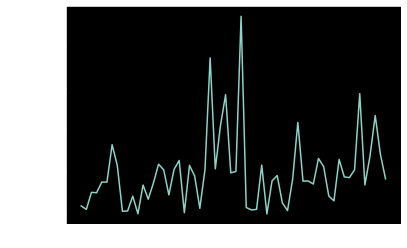

In [27]:
plt.plot(train_siic.groupby('shop_id').count()['date'])
plt.ylabel('records num per shop')

Text(0, 0.5, 'records num per item')

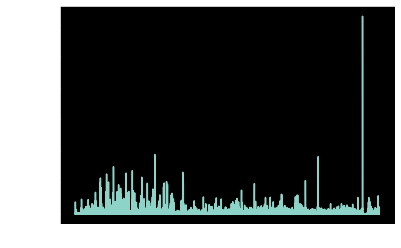

In [28]:
plt.plot(train_siic.groupby('item_id').count()['date'])
plt.ylabel('records num per item')

Text(0, 0.5, 'records num per item_category')

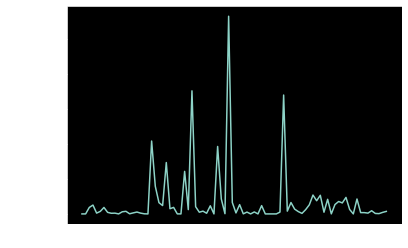

In [29]:
plt.plot(train_siic.groupby('item_category_id').count()['date'])
plt.ylabel('records num per item_category')

Text(0, 0.5, 'records num per date_block_num')

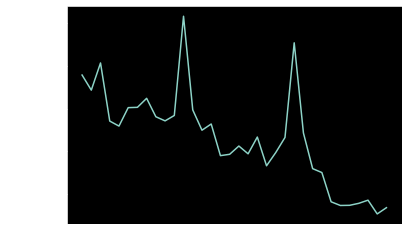

In [30]:
plt.plot(train_siic.groupby('date_block_num').count()['date'])
plt.ylabel('records num per date_block_num')

In [31]:
# date について
# 日付情報のデータ -> 日付特徴量作成関数等を作っても良いかもしれない？？
# 2013-1-1 ~ 2015-10-31 まで存在 -> 間に抜けはないのか？？

np.sort(pd.to_datetime(train['date'], format='%d.%m.%Y'))
train_siic['datetime'] = pd.to_datetime(train_siic['date'], format='%d.%m.%Y')

array(['2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', ...,
       '2015-10-31T00:00:00.000000000', '2015-10-31T00:00:00.000000000',
       '2015-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [41]:
# データを日付順にソート，前日との時間差分を計算　ー＞　間隔に空きが生まれていないか検討
# 特に空きは存在しない (出力はns 単位なので注意)

np.unique(train_siic['datetime'].sort_values().diff()) 
train_siic['datetime'].sort_values().diff().sort_values_values().values

array([         'NaT',              0, 86400000000000],
      dtype='timedelta64[ns]')

array([             0,              0,              0, ...,
       86400000000000, 86400000000000,          'NaT'],
      dtype='timedelta64[ns]')

# 外れ値への対応方針を train/test の比較をして決める
- 販売数の外れ値は１番目は価格が他に比べて異様に低いので販売ミスか，２番めは適切
- 販売価格の外れ値 一位は test に出てこないので除いても良い，２位は出てくる, データを見て思うのが，同じアイテムで値段のブレが大きい傾向があること，確認してみる？

In [45]:
train_siic.sort_values('item_cnt_day', ascending=False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,datetime
2900512,28.10.2015,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,2015-10-28
2717299,15.01.2015,24,12,20949,4.000000,1000.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",2015-01-15
2893943,30.09.2015,32,12,9248,1692.526158,669.0,Интернет-магазин ЧС,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,Служебные - Билеты,2015-09-30
2864750,30.09.2015,32,55,9249,1702.825746,637.0,Цифровой склад 1С-Онлайн,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,Билеты (Цифра),2015-09-30
1126322,14.04.2015,27,12,3731,1904.548077,624.0,Интернет-магазин ЧС,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,2015-04-14


In [52]:
# 販売数外れ値の組み合わせはテストデータにも存在
test[(test['shop_id']==12) & (test['item_id']==11373)]

# train の中にも同じ組み合わせは複数存在
train_siic[(train_siic['shop_id']==12) & (train_siic['item_id']==11373)].sort_values('item_cnt_day', ascending=False).head()

# 外れ値は販売価格が異常に安かったためだと考えられる -> なにかのミス？？　取り除いても問題はなさそう

,ID,shop_id,item_id
37296,37296,12,11373


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,datetime
2900512,28.10.2015,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,2015-10-28
2900405,19.05.2015,28,12,11373,155.192950,539.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,2015-05-19
2900136,22.11.2013,10,12,11373,102.466942,242.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,2013-11-22
2900394,16.04.2015,27,12,11373,120.120370,108.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,2015-04-16
2900139,29.11.2013,10,12,11373,72.200000,105.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,2013-11-29


In [54]:
# 販売数外れ値の組み合わせはテストデータにも存在
test[(test['shop_id']==12) & (test['item_id']==20949)]

# train の中にも同じ組み合わせは複数存在
train_siic[(train_siic['item_id']==20949)].sort_values('item_cnt_day', ascending=False).head()

# 2番目の外れ値は何回か出てきており，妥当なデータだと考えられる

,ID,shop_id,item_id
36160,36160,12,20949


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,datetime
2717299,15.01.2015,24,12,20949,4.0,1000.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",2015-01-15
2703717,28.06.2014,17,25,20949,5.0,501.0,"Москва ТРК ""Атриум""",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",2014-06-28
2717300,14.10.2015,33,12,20949,4.0,500.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",2015-10-14
2717298,19.12.2014,23,12,20949,4.0,500.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",2014-12-19
2704409,15.03.2014,14,24,20949,5.0,405.0,"Москва ТК ""Буденовский"" (пав.К7)",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",2014-03-15


In [56]:
train_siic.sort_values('item_price', ascending=False).head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,datetime
2105022,13.12.2013,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,2013-12-13
2899483,17.09.2013,8,12,11365,59200.0,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-09-17
2269597,20.03.2014,14,25,13199,50999.0,1.0,"Москва ТРК ""Атриум""",Коллекционные шахматы (Властелин Колец),69,Подарки - Сувениры,2014-03-20
2105041,29.01.2015,24,12,7241,49782.0,1.0,Интернет-магазин ЧС,UserGate Proxy & Firewall 6.X с модулем фильтр...,75,Программы - Для дома и офиса,2015-01-29
2862914,23.10.2015,33,42,13403,42990.0,1.0,"СПб ТК ""Невский Центр""","Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,2015-10-23
2862912,29.10.2015,33,12,13403,42990.0,1.0,Интернет-магазин ЧС,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,2015-10-29
2862910,20.10.2015,33,3,13403,42990.0,1.0,"Балашиха ТРК ""Октябрь-Киномир""","Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,2015-10-20
2862907,20.10.2015,33,22,13403,42990.0,1.0,Москва Магазин С21,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,2015-10-20
2105018,24.10.2013,9,12,7238,42000.0,1.0,Интернет-магазин ЧС,UserGate Proxy & Firewall 6.X до 100 сессий,75,Программы - Для дома и офиса,2013-10-24
2862908,22.10.2015,33,18,13403,41990.0,1.0,"Красноярск ТЦ ""Июнь""","Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,2015-10-22


In [60]:
# 販売価格外れ値一位のデータは test には出てこない -> 除外してOK
test[(test['shop_id']==12) & (test['item_id']==6066)]

# train の中にも同じ組み合わせは複数存在
train_siic[(train_siic['item_id']==6066)].sort_values('item_price', ascending=False).head()

,ID,shop_id,item_id


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,datetime
2105022,13.12.2013,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,2013-12-13


In [62]:
# 販売価格外れ値２位のデータは test には出てくる
test[(test['shop_id']==12) & (test['item_id']==11365)]

# train の中にも同じ組み合わせは複数存在，値段の振れ幅がかなり大きいのはなぜか？？？
train_siic[(train_siic['item_id']==11365)].sort_values('item_price', ascending=False)

,ID,shop_id,item_id
37350,37350,12,11365


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,datetime
2899483,17.09.2013,8,12,11365,59200.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-09-17
2899422,05.03.2013,2,12,11365,14530.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-03-05
2899488,23.09.2013,8,12,11365,11880.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-09-23
2899435,12.03.2013,2,12,11365,10540.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-03-12
2899484,28.09.2013,8,12,11365,9370.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-09-28
2899492,10.10.2013,9,12,11365,7750.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-10-10
2899486,25.09.2013,8,12,11365,7240.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-09-25
2899433,14.03.2013,2,12,11365,6950.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-03-14
2899505,05.11.2013,10,12,11365,6500.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-11-05
2899473,27.08.2013,7,12,11365,6040.000000,1.0,Интернет-магазин ЧС,Доставка (EMS),9,Доставка товара,2013-08-27


# train / test の間でのデータの違いを確認する

- test 
    - セットでの重複は存在しない
    - 42 shop それぞれでの同じ 5100 品目の販売個数を求める
    - データとしてあり得るすべての組み合わせは 130万，求める対象は21万セット
      - shop, item ともに限定されたもの

- test に存在するが train に含まれないケース
    - 363 / 5100  個の item_id が初出, なお item_id はすべて items テーブルの情報に含まれている
    - 102796 / 214200 個の shop_id x item_id の組み合わせ 約半数 は初出 内, 15246 (=42*363)  は item_id 自体が初出
    

In [75]:
# test 分析


test.groupby(['shop_id', 'item_id']).count().shape

test.drop_duplicates('shop_id').shape
test.drop_duplicates('item_id').shape

print(f'total test set : {42 * 5100}')

(214200, 1)

(42, 3)

(5100, 3)

total test set : 214200


In [74]:
shops.drop_duplicates('shop_id').shape
items.drop_duplicates('item_id').shape
print(f'total unique set : {60 * 22170}')

(60, 2)

(22170, 3)

total unique set : 1330200


In [76]:
# train 分析
train.groupby(['shop_id', 'item_id']).count().shape

train.drop_duplicates('shop_id').shape
train.drop_duplicates('item_id').shape


(424124, 4)

(60, 6)

(21807, 6)

In [96]:
# test に存在して train に存在しない組み合わせ or item_id, shop_id が存在するか確認 (おそらくなさそうだが)
# -> item_id で含まれないものが多く存在する. item 単位で初めて -> いままで販売していなかった商品？？ カテゴリーや名前から類似のデータを特定する必要があるか
# 363 / 5100  個の item_id が初出, なお item_id はすべて items テーブルの情報に含まれている

test[~test['shop_id'].isin(train['shop_id'])].shape
test[~test['item_id'].isin(train['item_id'])].shape

test_only_item_id = test[~test['item_id'].isin(train['item_id'])].drop_duplicates('item_id').item_id.values
test_only_item_id.shape

# test にしか存在しない item の item 情報自体は存在することを確認
set(test_only_item_id) <= set(items.item_id)

(0, 3)

(15246, 3)

(363,)

True

In [ ]:
363*42

In [110]:
# shop_id x item_id のセットだと test にしか存在しないのは 102796 / 214200 個　約半数の組み合わせは初出 内, 15246 は item_id 自体が初出

test_train_mergerd = pd.merge(test, train, on=['shop_id', 'item_id'], how='left')
test_train_mergerd_unique = test_train_mergerd.drop_duplicates(['shop_id', 'item_id'])
test_train_mergerd_unique[pd.isnull(test_train_mergerd_unique.date)].shape

(102796, 7)